# 🛠️  Performing Data Preprocessing

Data analysis involves using different tools and libraries to manipulate, visualize, and model data. Introducing the right libraries is essential for effective analysis.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import data

This code segment represents the initial steps in data analysis: loading the "DataCompetencySurvey" dataset, setting display options, printing a preview of the data, and evaluating missing values for quality assessment.

In [49]:
file_path = r"..\data\01_Raw\01_DataCompetencySurvey.xlsx"
#file_path = data.get_path("01_Raw", "01_DataCompetencySurvey.xlsx")
df = pd.read_excel(file_path, index_col=0)

pd.set_option("display.max_columns", None)
#print(df.head())
# print(df.info())
# print(df.describe())
# print(df.isnull().sum())
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
#print(missing_percentage)

#Define style for visuals
barColor = "#081D57"
backgroundColor = "#FFFFD9"

# ❓ Analyzing Missing Data

Często w analizie danych, warto sprawdzić, czy w zbiorze danych występują brakujące wartości. Brakujące dane mogą mieć istotny wpływ na wyniki analizy, dlatego ważne jest ich zidentyfikowanie i ewentualne przetwarzanie. Poniżej przedstawione są dwa sposoby analizy brakujących danych:

### Heatmap of Missing Values

Heatmapa jest skutecznym narzędziem do wizualizacji brakujących danych. Dzięki jej intuicyjnej interpretacji, możliwości szybkiego przeglądu całego zbioru danych oraz łatwości porównywania między różnymi zestawami danych, heatmapy pozwalają na szybkie zrozumienie i identyfikację wzorców brakujących danych.

### Bar Chart of Missing Values

Wykres słupkowy (bar chart) jest skutecznym narzędziem wizualizacji brakujących danych, gdzie każdy słupek reprezentuje liczbę brakujących wartości dla danej kolumny. Prosty i intuicyjny w interpretacji, umożliwia szybkie zrozumienie rozkładu brakujących danych w różnych kolumnach. Dodatkowo, pozwala na porównanie proporcji brakujących danych między różnymi kolumnami.

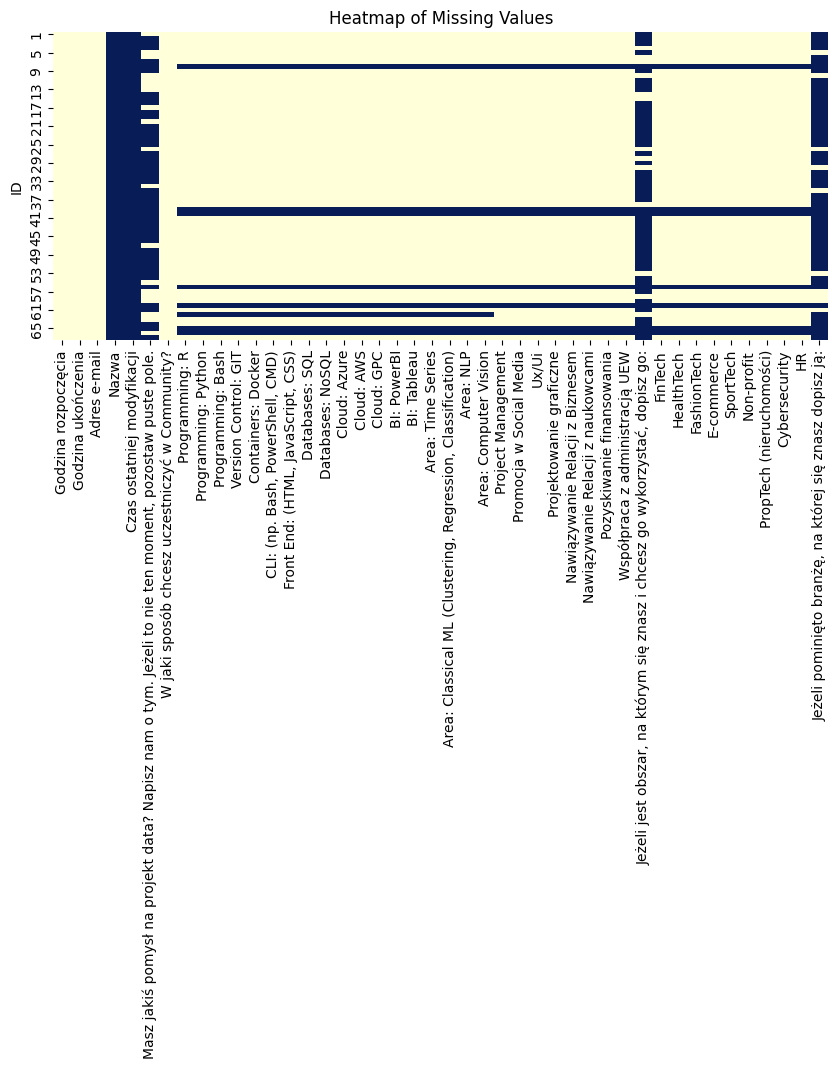

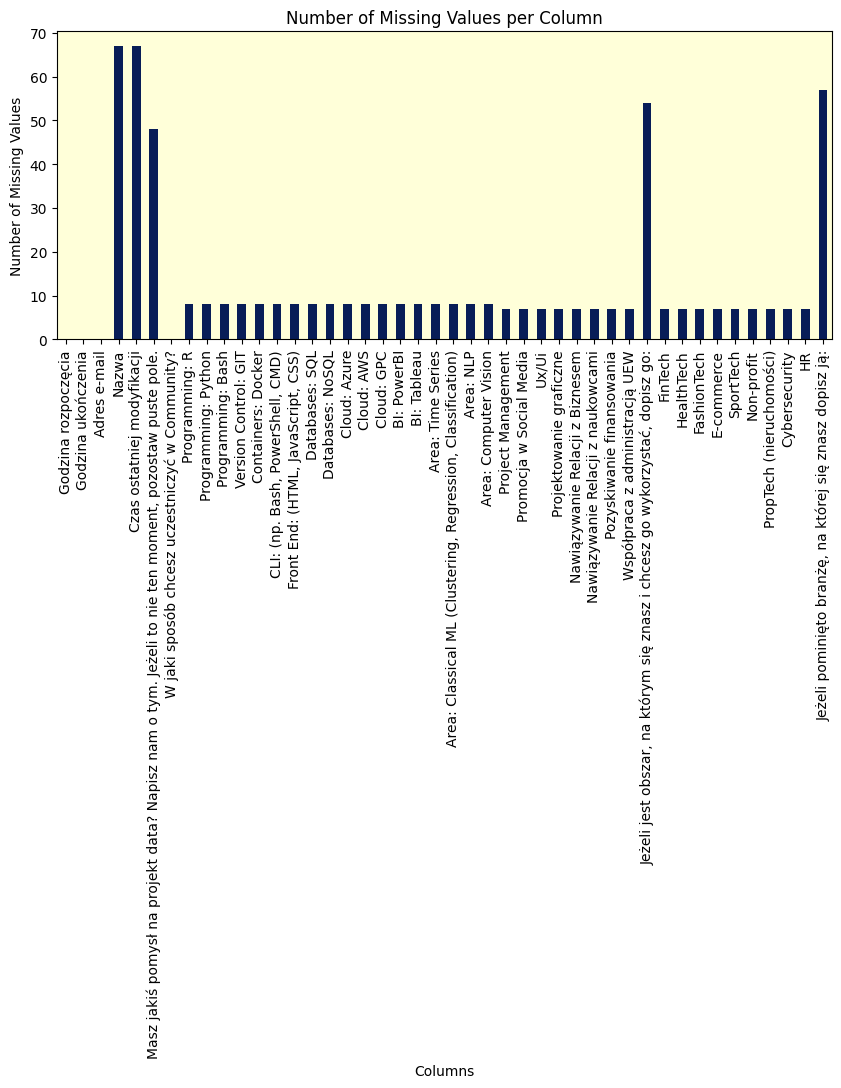

In [51]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Heatmap of Missing Values")
plt.show()

missing_values.plot(kind="bar", figsize=(10, 4), color=barColor).set_facecolor(
    backgroundColor
)
plt.title("Number of Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()

This code snippet preprocesses the data from the Community Survey by creating binary features based on participant preferences. It categorizes participants' desired involvement in the community into four categories and assigns binary values accordingly. Additionally, it removes unnecessary columns and renames relevant ones for clarity. This preparation step sets the stage for subsequent analysis and visualization of the survey data.








In [52]:
df["Chcę uczystniczyć"] = np.where(
    df["W jaki sposób chcesz uczestniczyć w Community?"]
    == "Chcę uczestniczyć w projekcie data",
    1,
    0,
)
df["Chcę organizować"] = np.where(
    df["W jaki sposób chcesz uczestniczyć w Community?"]
    == 'Chcę organizować "życie" Community',
    1,
    0,
)
df["Chcę konsumować"] = np.where(
    df["W jaki sposób chcesz uczestniczyć w Community?"]
    == 'Póki co chcę czerpać, obserwować, "konsumować content"',
    1,
    0,
)
df["Chcę org. + ucz."] = np.where(
    df["W jaki sposób chcesz uczestniczyć w Community?"]
    == 'Chcę uczestniczyć w projekcie data i organizować "życie" Community',
    1,
    0,
)

# df.loc[df["Chcę konsumować"] == 1, :] = df.loc[df["Chcę konsumować"] == 1, :].fillna("0") #make impact for corr visual

df = df.drop(
    columns=[
        "W jaki sposób chcesz uczestniczyć w Community?",
        "Godzina rozpoczęcia",
        "Godzina ukończenia",
        "Adres e-mail",
        "Nazwa",
        "Czas ostatniej modyfikacji",
    ]
)

df = df.rename(
    columns={
        "Front End: (HTML, JavaScript, CSS)": "Front End",
        "CLI: (np. Bash, PowerShell, CMD)": "CLI",
        "Area: Classical ML (Clustering, Regression, Classification)": "Area: Classical ML",
        "Nawiązywanie Relacji z Biznesem": "Naw. Rel. z Biznesem",
        "Nawiązywanie Relacji z naukowcami": "Naw. Rel. z  naukowcami",
        "Współpraca z administracją UEW": "Wsp. z administracją UEW",
        "Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.": "Twój pomysł",
        "Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:": "Zainteresowania",
        "Jeżeli pominięto branżę, na której się znasz dopisz ją:": "Dodatkowe Branży",
    }
)

df.to_csv(r"..\data\02_Interim\01_DataCompetencySurvey.csv")

In [53]:
# missing_values = df.isnull().sum()

# plt.figure(figsize=(10, 4))
# sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
# plt.title('Heatmap of Missing Values')
# plt.show()

# missing_values.plot(kind='bar', figsize=(10, 4), color=barColor).set_facecolor(backgroundColor)
# plt.title('Number of Missing Values per Column')
# plt.xlabel('Columns')
# plt.ylabel('Number of Missing Values')
# plt.show()